In [12]:
#Importing Required Libraries for Classfication Problem
import sklearn as sk  
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from matplotlib import pyplot as plt

#import xgboost as xgb

In [13]:
#Read the Input csv into a DataFrame
df = pd.read_csv('C:\\Users\\Mukesh\\Desktop\\GIT\\JHR\\train.csv', sep=',') 
#Read the Input csv into a DataFrame
df_test= pd.read_csv('C:\\Users\\Mukesh\\Desktop\\GIT\\JHR\\test.csv', sep=',') 

In [14]:
df.head()
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [15]:
df = df[['city_development_index','gender','relevent_experience','enrolled_university','education_level','experience','company_size','company_type','last_new_job','training_hours','target']]
df.head()

df_test = df_test[['city_development_index','gender','relevent_experience','enrolled_university','education_level','experience','company_size','company_type','last_new_job','training_hours']]
df_test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours
0,0.448,NaN,No relevent experience,Full time course,Graduate,<1,1000-4999,Public Sector,NaN,15
1,0.939,Male,No relevent experience,no_enrollment,Graduate,>20,50-99,Pvt Ltd,1,94
2,0.920,Male,No relevent experience,Full time course,Graduate,3,NaN,NaN,1,17
3,0.924,Male,No relevent experience,no_enrollment,Phd,>20,50-99,Pvt Ltd,2,76
4,0.830,Male,Has relevent experience,no_enrollment,Graduate,6,<10,Pvt Ltd,2,65


In [16]:
df[df.isnull().any(axis=1)]

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
2,0.910,NaN,Has relevent experience,no_enrollment,Graduate,6,50-99,Public Sector,2,4,0
4,0.887,NaN,No relevent experience,no_enrollment,Masters,8,NaN,NaN,2,88,1
15,0.939,Male,Has relevent experience,Full time course,High School,9,NaN,NaN,1,28,0
19,0.926,Male,Has relevent experience,no_enrollment,Masters,>20,NaN,NaN,4,11,0
22,0.897,NaN,Has relevent experience,no_enrollment,High School,3,NaN,NaN,1,12,0
23,0.939,NaN,No relevent experience,NaN,Graduate,1,10000+,NaN,never,11,0
26,0.754,Male,No relevent experience,no_enrollment,Phd,15,NaN,NaN,1,41,0
28,0.920,Male,Has relevent experience,no_enrollment,Graduate,5,NaN,NaN,never,101,0
30,0.920,NaN,No relevent experience,no_enrollment,Graduate,8,10000+,Pvt Ltd,NaN,104,0
33,0.920,Male,Has relevent experience,Full time course,Graduate,11,NaN,NaN,1,55,0


In [17]:
cols = ["gender", "company_size","company_type","enrolled_university","education_level","last_new_job"]

df[cols]=df[cols].fillna(df.mode().iloc[0])

df_test[cols]=df_test[cols].fillna(df.mode().iloc[0])

In [18]:
cols = ["experience"]

df[cols]=df[cols].fillna(df.mean().iloc[0])

df_test[cols]=df[cols].fillna(df.mean().iloc[0])

In [19]:
df[df.isnull().any(axis=1)]

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target


In [20]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,0.689,Male,Has relevent experience,no_enrollment,Graduate,3,100-500,Pvt Ltd,1,106,0
1,0.923,Male,Has relevent experience,no_enrollment,Graduate,14,<10,Funded Startup,1,69,0
2,0.910,Male,Has relevent experience,no_enrollment,Graduate,6,50-99,Public Sector,2,4,0
3,0.666,Male,Has relevent experience,no_enrollment,Graduate,14,50-99,Pvt Ltd,1,26,0
4,0.887,Male,No relevent experience,no_enrollment,Masters,8,50-99,Pvt Ltd,2,88,1


In [21]:
cols = ["city_development_index","gender","relevent_experience","enrolled_university","education_level","company_size","experience","company_type","last_new_job","target"]
df[cols] = df[cols].astype('category')

cols_t = ["city_development_index","gender","relevent_experience","enrolled_university","education_level","company_size","experience","company_type","last_new_job"]
df_test[cols_t] = df_test[cols_t].astype('category')



In [22]:
df.dtypes

df_test.dtypes

city_development_index    category
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
dtype: object

In [23]:
df["city_development_index"] = df["city_development_index"].cat.codes   
df["gender"] = df["gender"].cat.codes 
df["relevent_experience"] = df["relevent_experience"].cat.codes 
df["enrolled_university"] = df["enrolled_university"].cat.codes 
df["education_level"] = df["education_level"].cat.codes 
df["company_size"] = df["company_size"].cat.codes 
df["experience"] = df["experience"].cat.codes
df["company_type"] = df["company_type"].cat.codes
df["last_new_job"] = df["last_new_job"].cat.codes

df_test["city_development_index"] = df_test["city_development_index"].cat.codes   
df_test["gender"] = df_test["gender"].cat.codes 
df_test["relevent_experience"] = df_test["relevent_experience"].cat.codes 
df_test["enrolled_university"] = df_test["enrolled_university"].cat.codes 
df_test["education_level"] = df_test["education_level"].cat.codes 
df_test["company_size"] = df_test["company_size"].cat.codes 
df_test["experience"] = df_test["experience"].cat.codes
df_test["company_type"] = df_test["company_type"].cat.codes
df_test["last_new_job"] = df_test["last_new_job"].cat.codes

In [24]:
df.head()

df_test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours
0,0,1,1,0,0,14,2,4,0,15
1,91,1,1,2,0,6,4,5,0,94
2,85,1,1,0,0,17,4,5,0,17
3,88,1,1,2,3,6,4,5,1,76
4,61,1,0,2,0,19,7,5,1,65


In [25]:
print(df.isnull().sum())

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [26]:
df['target'].value_counts()

0    15934
1     2425
Name: target, dtype: int64

In [27]:
#Steps to balance the class variables
# Separate majority and minority classes
df_majority = df[df.target== 0]
df_minority = df[df.target== 1]

In [28]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15934,    # to match majority class
                                 random_state=123) # reproducible results

In [29]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [30]:
df_upsampled.target.value_counts()

1    15934
0    15934
Name: target, dtype: int64

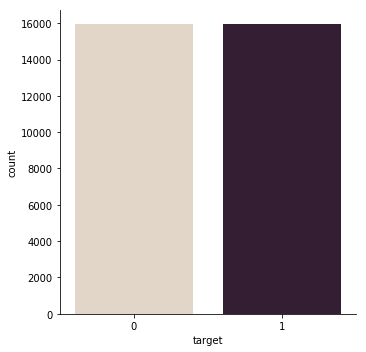

In [31]:
sns.catplot(x="target", kind="count", palette="ch:.25", data=df_upsampled);

In [32]:
df_upsampled.target.head()

0    0
1    0
2    0
3    0
5    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [33]:
df_upsampled.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,24,1,0,2,0,14,1,5,0,106,0
1,87,1,0,2,0,6,7,1,0,69,0
2,82,1,0,2,0,17,4,4,1,4,0
3,21,1,0,2,0,6,4,5,0,26,0
5,14,0,0,2,0,19,6,5,1,34,0


In [34]:
#Once Balanced, Assign the Class and Independent Attributes to Variables
Y = df_upsampled.iloc[:,10] 
X = df_upsampled.iloc[:,0:10]
X.head()
Y.head()

0    0
1    0
2    0
3    0
5    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [47]:
#Split the input into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_test = df_test.iloc[:,0:10]

In [48]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='binary:logistic',subsample=0.8 ,colsample_bytree = 0.8, learning_rate = 0.05,
                max_depth = 10, alpha = 10, n_estimators = 1000, random_state=50, gamma = 0.2,nthread=4,scale_pos_weight=1,
                           seed=27)

clf = xg_reg.fit(X,Y);
predicted= clf.predict(X_test) # 0: <=50K , 1: >50K

#results = confusion_matrix(Y_test,predicted)
#print("Predicted Value:", predicted)
#print("roc_auc_score:",metrics.roc_auc_score(Y_test, predicted.round()))
#print ('Confusion Matrix :')
#print(results)

In [49]:
pd.DataFrame(predicted, columns=['target']).to_csv('C:\\Users\\Mukesh\\Desktop\\GIT\\JHR\\prediction.csv')